In [1]:
!pip install minisom
from minisom import MiniSom  

import matplotlib.pyplot as plt
%matplotlib inline

  Created wheel for minisom: filename=MiniSom-2.2.9-py3-none-any.whl size=8595 sha256=2ba8d7ae6a6da1afb21eb8c37f50e0d39c9bdd21430b90073bafffdd07dc6412
  Stored in directory: /root/.cache/pip/wheels/3d/a1/10/f50b6f4865652eac239a2700de411c3078c27e1318320e494c
Successfully built minisom


# Part 1 - Identify the Frauds with the Self-Organizing Map


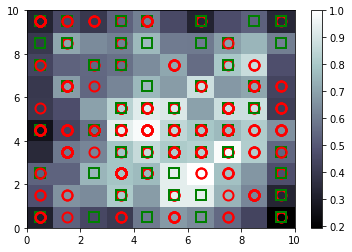

In [8]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

# Training the SOM
#from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()


In [9]:
# Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(5,3)], mappings[(8,3)]), axis = 0)
frauds = sc.inverse_transform(frauds).reshape(-1, 1)
frauds

array([[1.5776156e+07],
       [1.0000000e+00],
       [2.2080000e+01],
       [1.1460000e+01],
       [2.0000000e+00],
       [4.0000000e+00],
       [4.0000000e+00],
       [1.5850000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [2.0000000e+00],
       [1.0000000e+02],
       [1.2130000e+03],
       [1.5783859e+07],
       [1.0000000e+00],
       [3.3580000e+01],
       [2.5000000e-01],
       [2.0000000e+00],
       [3.0000000e+00],
       [5.0000000e+00],
       [4.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [4.2000000e+02],
       [1.0000000e+00],
       [1.5713983e+07],
       [1.0000000e+00],
       [1.8250000e+01],
       [1.6500000e-01],
       [2.0000000e+00],
       [2.0000000e+00],
       [4.0000000e+00],
       [2.5000000e-01],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [1.000000

In [10]:


# Creating the matrix of features
customers = dataset.iloc[:, 1:].values

# Creating the dependent variable
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
    if dataset.iloc[i,0] in frauds:
        is_fraud[i] = 1

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(customers, is_fraud, batch_size = 1, epochs = 2)

# Predicting the probabilities of frauds
y_pred = classifier.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

Epoch 1/2
690/690 [==============================] - 2s 2ms/step - loss: 0.4708 - accuracy: 0.9710
Epoch 2/2
690/690 [==============================] - 1s 2ms/step - loss: 0.1810 - accuracy: 0.9725


# Part 2 - Going from Unsupervised to Supervised Deep Learning

In [11]:
# Self Organizing Map

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)



In [12]:
# Training the SOM
#from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)



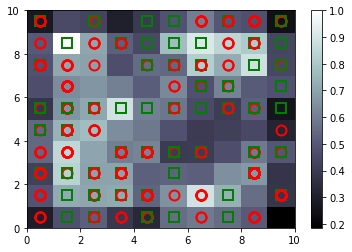

array([[1.5810723e+07],
       [1.0000000e+00],
       [3.8170000e+01],
       [1.0125000e+01],
       [2.0000000e+00],
       [1.4000000e+01],
       [4.0000000e+00],
       [2.5000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [6.0000000e+00],
       [0.0000000e+00],
       [2.0000000e+00],
       [5.2000000e+02],
       [1.9700000e+02],
       [1.5752601e+07],
       [1.0000000e+00],
       [2.8250000e+01],
       [5.1250000e+00],
       [2.0000000e+00],
       [1.4000000e+01],
       [4.0000000e+00],
       [4.7500000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [2.0000000e+00],
       [0.0000000e+00],
       [2.0000000e+00],
       [4.2000000e+02],
       [8.0000000e+00],
       [1.5810723e+07],
       [1.0000000e+00],
       [3.8170000e+01],
       [1.0125000e+01],
       [2.0000000e+00],
       [1.4000000e+01],
       [4.0000000e+00],
       [2.5000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [6.0000000e+00],
       [0.000000

In [14]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

# Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(6,8)], mappings[(6,8)]), axis = 0)
frauds = sc.inverse_transform(frauds).reshape(-1, 1)

frauds
